<a href="https://colab.research.google.com/github/salmakhale/DL-computer-vision/blob/main/vgg_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/test1.jpg
/kaggle/input/images2/test2.jpg
/kaggle/input/vgg-face-weightsh5/vgg_face_weights.h5


In [ ]:
import keras
from keras.models import *
from keras.preprocessing import *  #For Data prerpocessing before making my own Model
from keras.layers import *
import PIL
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
!ls ../input

In [ ]:
!ls -l ../input/vgg-face-weightsh5

In [ ]:
from keras.models import model_from_json
model.load_weights(r'../input/vgg-face-weightsh5/vgg_face_weights.h5')

In [ ]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

Adding Images From Your PC

In [ ]:
from IPython.display import Image
import os
!ls ../input/images/

In [ ]:
Image("/kaggle/input/images/test1.jpg")

In [ ]:
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.imagenet_utils import preprocess_input
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

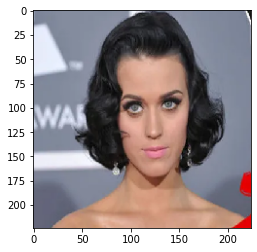

In [ ]:
from PIL import Image

# Opens a image in RGB mode
img_path1 = "/kaggle/input/images/test1.jpg"
img_path2 = "/kaggle/input/images2/test2.jpg"

from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img(img_path1, target_size=(224, 224))
img2 = image.load_img(img_path2, target_size=(224, 224))

plt.imshow(img1)


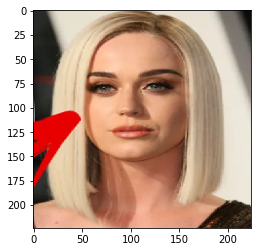

In [ ]:
plt.imshow(img2)

In [ ]:
img1_representation = vgg_face_descriptor.predict(preprocess_image(img_path1))[0,:]
img2_representation = vgg_face_descriptor.predict(preprocess_image(img_path2))[0,:]

In [ ]:
epsilon = 0.40 #cosine similarity
#epsilon = 120 #euclidean distance
import numpy as np
#findCosineDistance
a = np.matmul(np.transpose(img1_representation), img2_representation)
b = np.sum(np.multiply(img1_representation, img1_representation))
c = np.sum(np.multiply(img2_representation, img2_representation))
cosine_similarity = 1 - (a / (np.sqrt(b) * np.sqrt(c)))
cosine_similarity

0.5439209342002869

In [ ]:
#findEuclideanDistance
euclidean_distance = img1_representation - img2_representation
euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
euclidean_distance = np.sqrt(euclidean_distance)
euclidean_distance

104.19064

In [ ]:
if(cosine_similarity < epsilon):
    print("verified... they are same person")
else:
    print("unverified! they are not same person!")

unverified! they are not same person!
